Restaurant rating prediction case study in python

In [50]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Reading the dataset
import pandas as pd
import numpy as np
ZomatoData=pd.read_csv('C:/Users/acer/PYTHON/PROJECTS/ZomatoRating Prediction/ZomatoData.csv', encoding='latin')
print('Shape before deleting duplicate values:', ZomatoData.shape)

# Removing duplicate rows if any
ZomatoData=ZomatoData.drop_duplicates()
print('Shape After deleting duplicate values:', ZomatoData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
ZomatoData.head(20)

Shape before deleting duplicate values: (9551, 19)
Shape After deleting duplicate values: (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,Botswana Pula(P),No,No,No,No,3,336,1000,4.4
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",Botswana Pula(P),Yes,No,No,No,4,520,2000,4.0
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",Botswana Pula(P),Yes,No,No,No,4,677,2000,4.2
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",Botswana Pula(P),Yes,No,No,No,4,621,6000,4.9
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,Botswana Pula(P),Yes,No,No,No,3,532,1100,4.8


Defining the problem statement:
Create a Predictive model which can predict the future Rating of a restaurant
Target Variable: Rating
Predictors: location, menu, cost etc.
Rating=1 Worst
Rating=5 Best

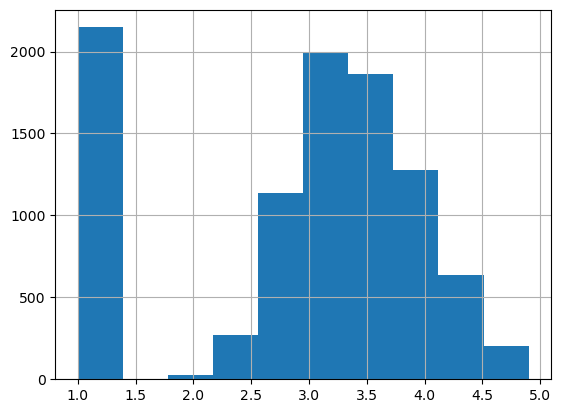

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
# Creating Bar chart as the Target variable is Continuous
ZomatoData['Rating'].hist(bins=10)
plt.show()

Basic Data Exploration

In [55]:
# Looking at sample rows in the data
ZomatoData.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [56]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Removing those variables from data which have too many missing values (Missing Values > 30%)
# Remoing Qualitative variables which cannot be used in Machine Learning
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [57]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

Feature Engineering

In this data the "Cuisines" column cannot be used directly because it will generate 1825 dummy variables!! Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [59]:
def cuisine_counter(inpStr):
    NumCuisines=len(str(inpStr).split(','))
    return(NumCuisines)

In [60]:
# Creating a new feature in data
# We will further explore the new feature just like other features
ZomatoData['CuisineCount']=ZomatoData['Cuisines'].apply(cuisine_counter)
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


In [61]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines']
ZomatoData = ZomatoData.drop(UselessColumns,axis=1)
ZomatoData.head()


,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


In [62]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same
%matplotlib inline
import matplotlib.pyplot as plt
def PlotBarCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
    plt.show()
   

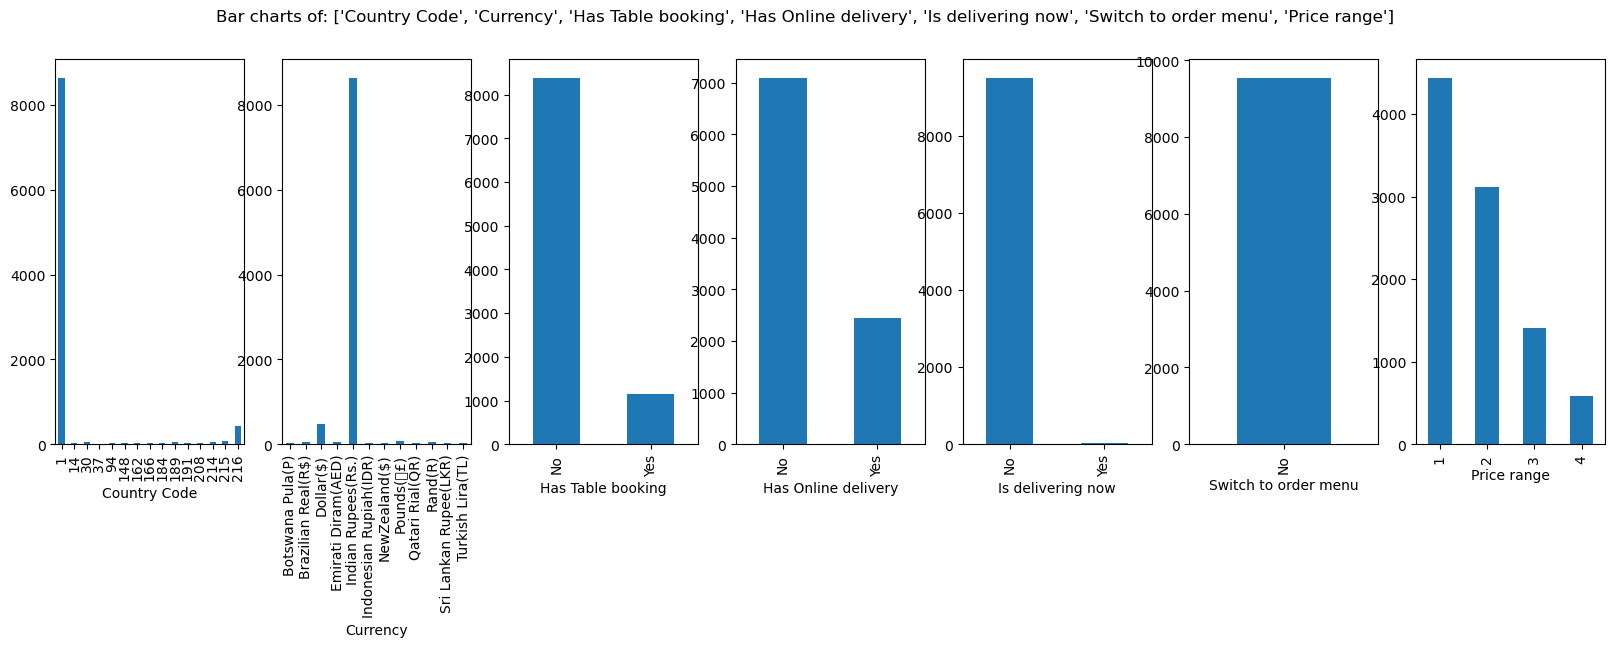

In [63]:
#####################################################################Alternate
# Calling the function
PlotBarCharts(inpData=ZomatoData, colsToPlot=[
    'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now','Switch to order menu','Price range'])


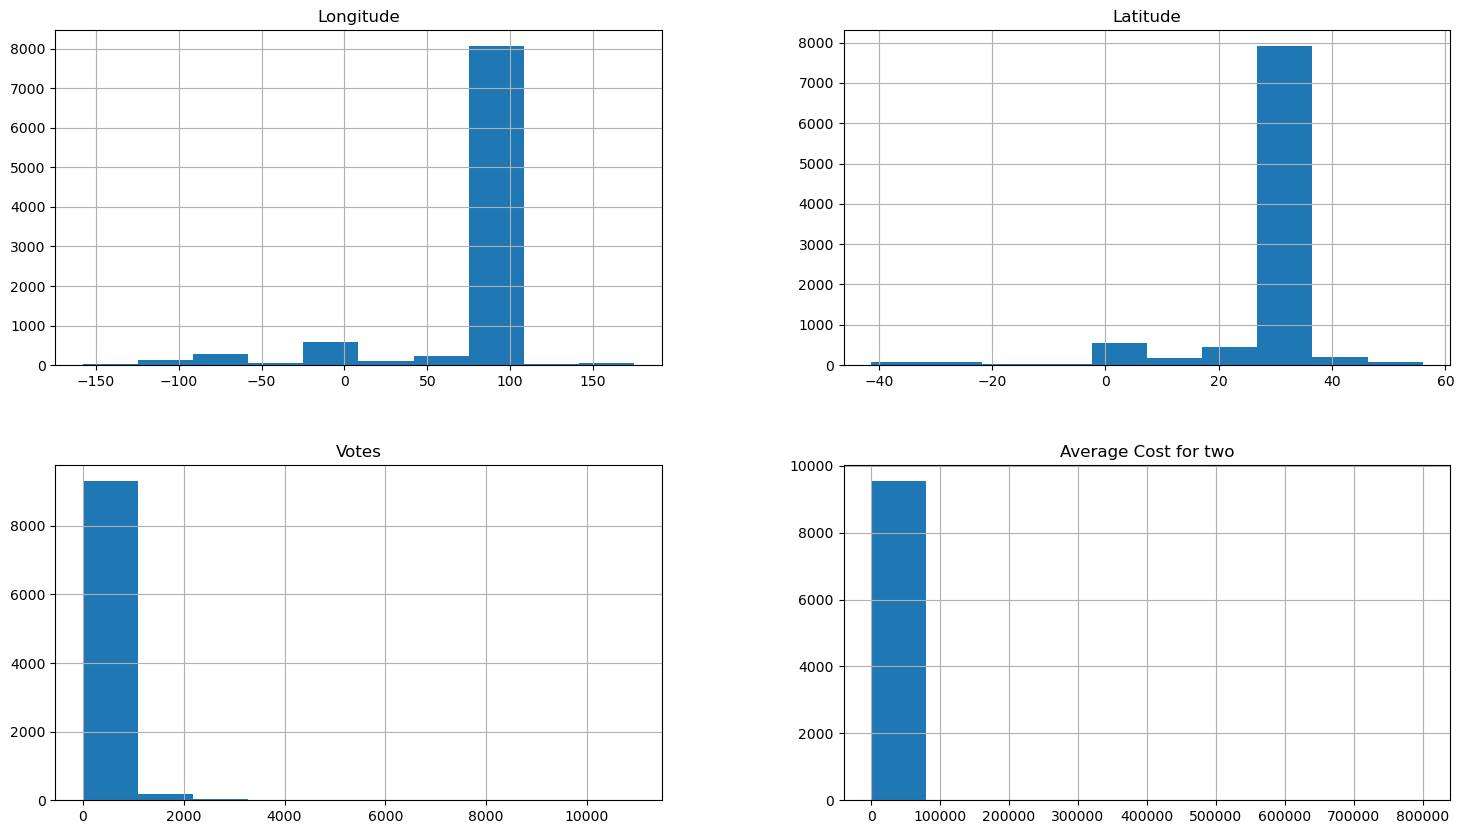

In [64]:
# Plotting histograms of multiple columns together
%matplotlib inline
import matplotlib.pyplot as plt
ZomatoData.hist(['Longitude', 'Latitude', 'Votes', 'Average Cost for two'], figsize=(18,10))
plt.show()

In [65]:
#Outlier treatment
#Replacing outliers for 'Votes'
# Finding nearest values to 4000 mark
ZomatoData['Votes'][ZomatoData['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

In [66]:
# Replacing outliers with nearest possibe value
ZomatoData['Votes'][ZomatoData['Votes']>4000] =3986

In [67]:
#Replacing outliers for 'Average Cost for two'
# Finding nearest values to 50000 mark
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

In [68]:
# Replacing outliers with nearest possibe value
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two']>50000] =8000

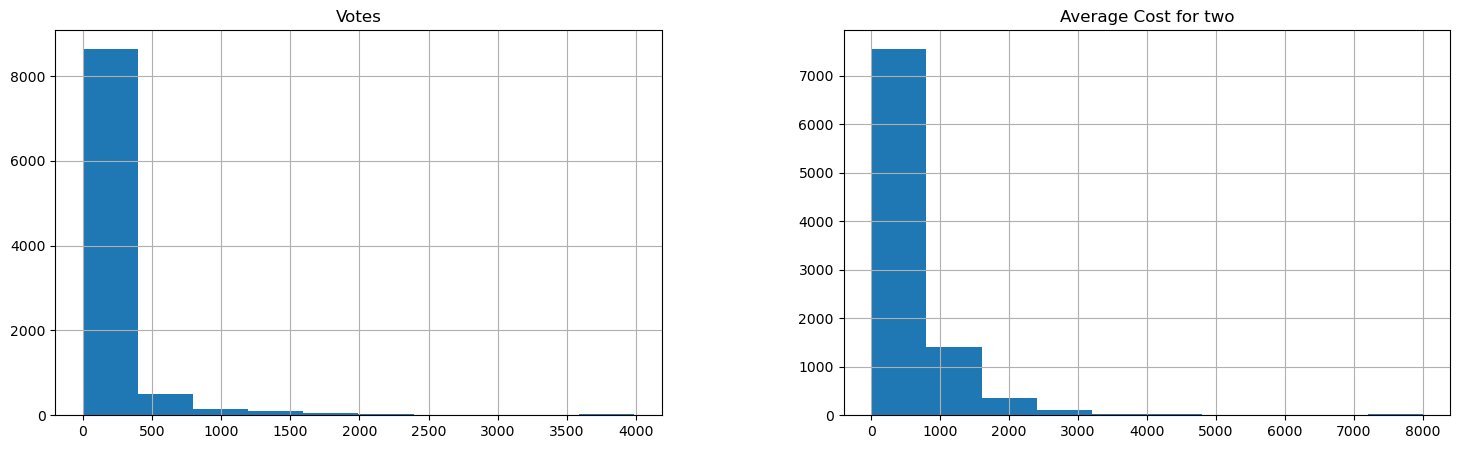

In [69]:
# Visualizing distribution after outlier treatment
# The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.
import matplotlib.pyplot as plt

ZomatoData.hist(['Votes', 'Average Cost for two'], figsize=(18,5))
plt.show()

In [70]:
# Finding how many missing values are there for each column
ZomatoData.isnull().sum()

Country Code            0
Longitude               0
Latitude                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
CuisineCount            0
dtype: int64

Feature Selection
Visual exploration of relationship between variables
Statistical measurement of relationship strength between variables
Relationship exploration: Continuous Vs Continuous -- Scatter Charts

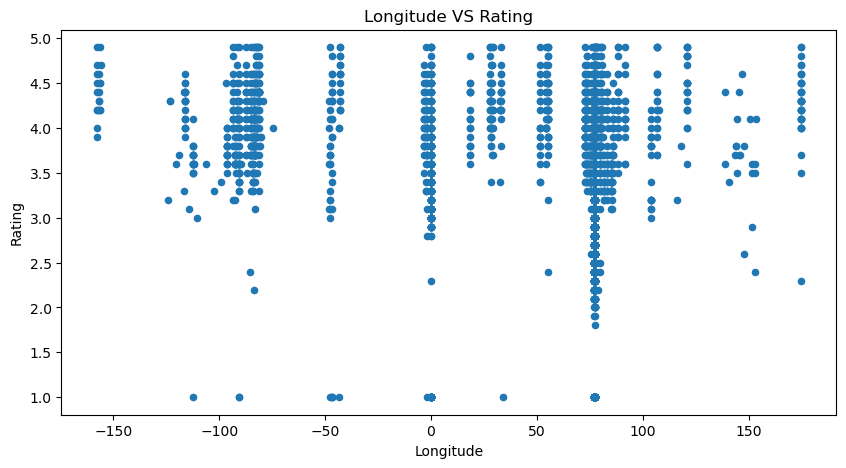

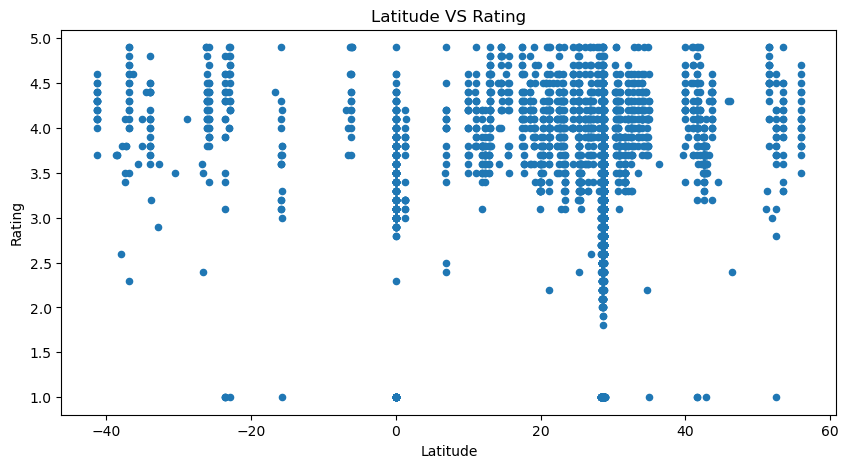

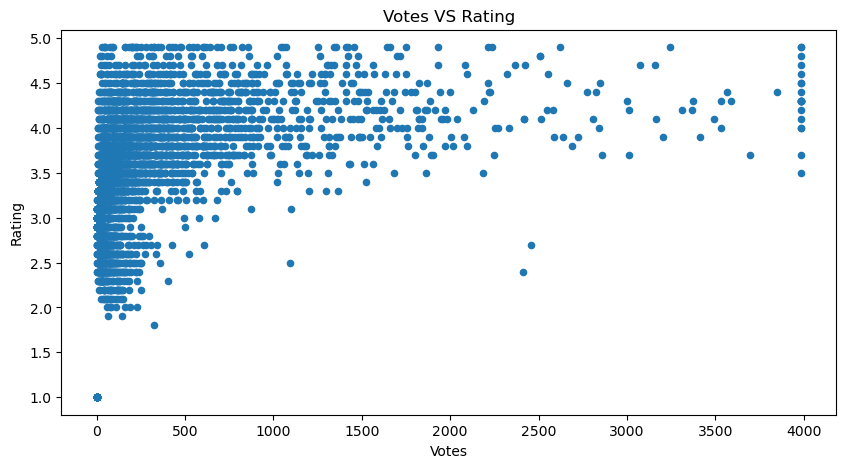

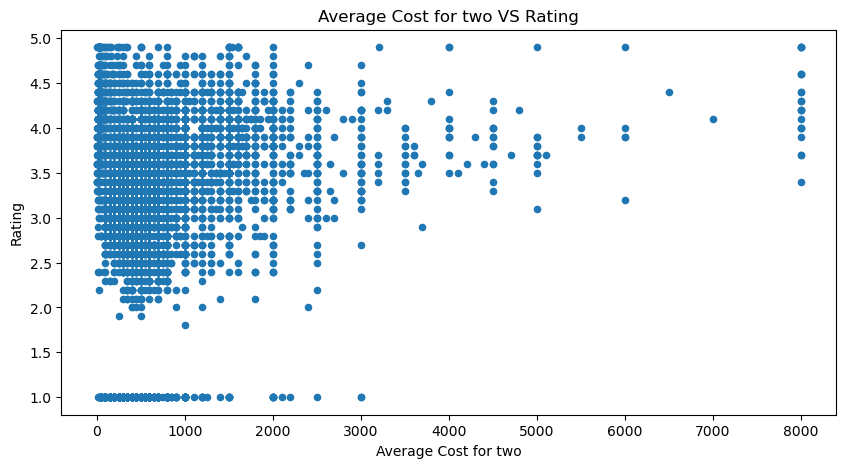

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    ZomatoData.plot.scatter(x=predictor, y='Rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')

plt.show()

In [73]:


# Calculating correlation matrix
ContinuousCols=['Rating','Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Creating the correlation matrix
CorrelationData=ZomatoData[ContinuousCols].corr()
CorrelationData


,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,-0.145930,-0.019806,0.385249,0.248981
Longitude,-0.145930,1.000000,0.043207,-0.101381,0.210272
Latitude,-0.019806,0.043207,1.000000,-0.019687,-0.064748
Votes,0.385249,-0.101381,-0.019687,1.000000,0.245662
Average Cost for two,0.248981,0.210272,-0.064748,0.245662,1.000000


In [74]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.2 ]

Rating                  1.000000
Votes                   0.385249
Average Cost for two    0.248981
Name: Rating, dtype: float64

Relationship exploration: Categorical Vs Continuous -- Box Plots

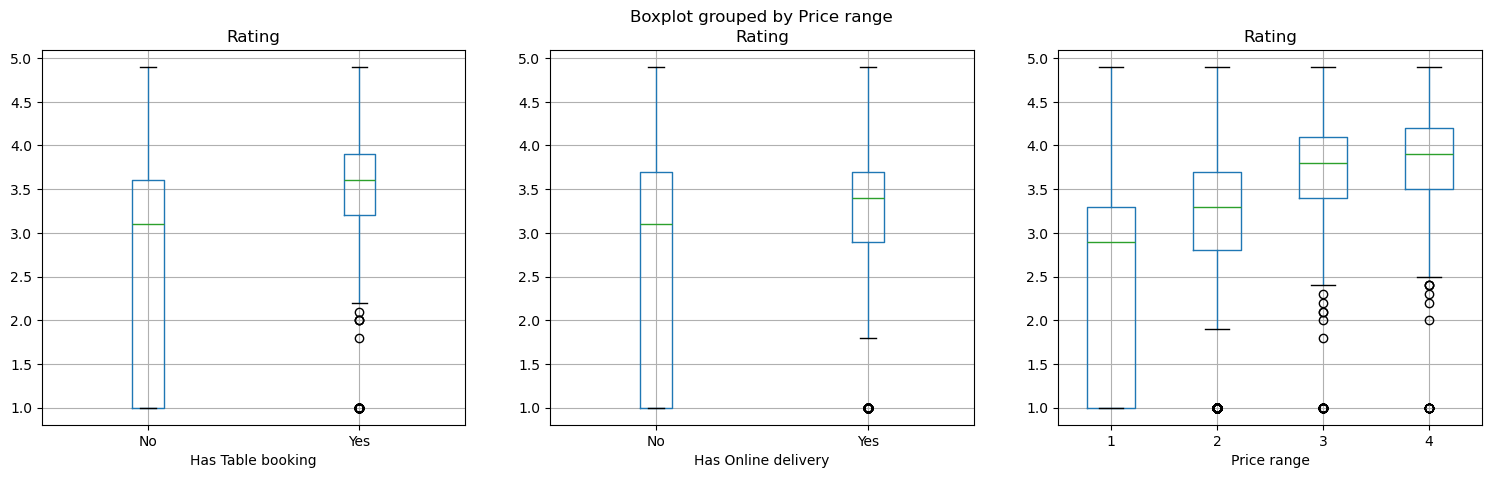

In [76]:

# Box plots for Categorical Target Variable "Rating" and continuous predictors
CategoricalColsList=['Has Table booking', 'Has Online delivery', 'Price range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ZomatoData.boxplot(column='Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])
plt.show()

Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [78]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [79]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Has Table booking', 'Has Online delivery', 'Price range']
FunctionAnova(inpData=ZomatoData, 
              TargetVariable='Rating', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Has Table booking is correlated with Rating | P-Value: 3.9393041304297214e-82
Has Online delivery is correlated with Rating | P-Value: 1.6952587420575958e-92
Price range is correlated with Rating | P-Value: 0.0


['Has Table booking', 'Has Online delivery', 'Price range']

Final selected Categorical columns:

'Has Table booking', 'Has Online delivery', 'Price range'

In [81]:
# Selecting final predictors for Machine Learning
# Based on the above tests, selecting the final columns for machine learning

SelectedColumns=['Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range']

# Selecting final columns
DataForML=ZomatoData[SelectedColumns]
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


In [82]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [83]:
# Data Pre-processing for Machine Learning
# Converting the binary nominal variable to numeric using 1/0 mapping
# Converting the binary nominal variable sex to numeric
DataForML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)

In [84]:
# Converting the nominal variable to numeric using get_dummies()
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating']=ZomatoData['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


Machine Learning: Splitting the data into Training and Testing sample

In [86]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Votes', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Rating'],
      dtype='object')

In [87]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['Votes', 'Average Cost for two', 'Has Table booking',
           'Has Online delivery', 'Price range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

Standardization/Normalization of data

In [89]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6685, 5)
(6685,)
(2866, 5)
(2866,)


Multiple Linear Regression

In [92]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.30651463134648727

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              2.0
1     4.1              3.0
2     3.2              3.0
3     4.4              3.0
4     3.5              2.0
Mean Accuracy on test data: 56.82382371482229
Median Accuracy on test data: 74.07407407407408

Accuracy values for 10-fold Cross Validation:
 [73.07128832 57.23634237 61.61405423 59.97790149 62.17608774 29.03036814
 48.84028175 51.06832392 40.27174351 53.61838933]

Final Average Accuracy of the model: 53.69


Decision Trees

DecisionTreeRegressor(max_depth=6)
R2 Value: 0.9120831300688722


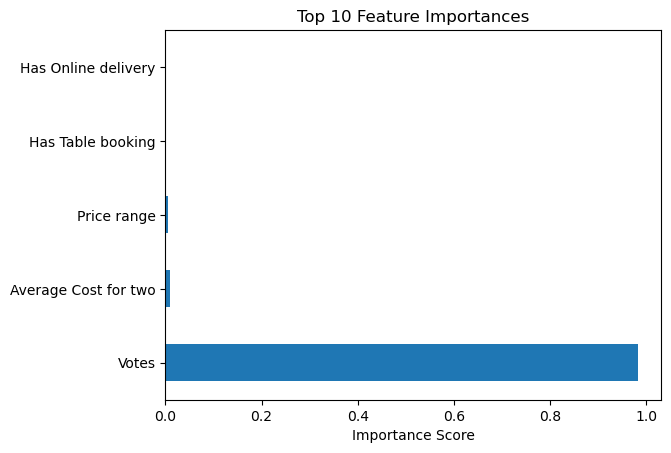


##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 91.61407688871982
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [90.79867804 92.40734815 92.36096482 92.60045486 92.95525464 95.05770184
 93.713076   93.81800852 92.90082114 91.96501727]

Final Average Accuracy of the model: 92.86


In [94]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Corrected criterion parameter
RegModel = DecisionTreeRegressor(max_depth=6, criterion='squared_error')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT = RegModel.fit(X_train, y_train)
prediction = DT.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable, 'Predicted' + TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (
    abs(TestingDataResults[TargetVariable] - TestingDataResults['Predicted' + TargetVariable]) / TestingDataResults[TargetVariable]
)

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)  # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


Plotting a Decision Tree

In [98]:
# !pip install graphviz
# !conda install graphviz
# !pip install pydotplus

# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder

import os

# Try this path if you're using Anaconda
os.environ["PATH"] += os.pathsep + "C:/Users/acer/anaconda3/pkgs/graphviz"

# OR try this path if you installed Graphviz manually
# os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

import shutil
print("dot location:", shutil.which("dot"))

dot location: C:\Users\acer\anaconda3\Library\bin\dot.EXE


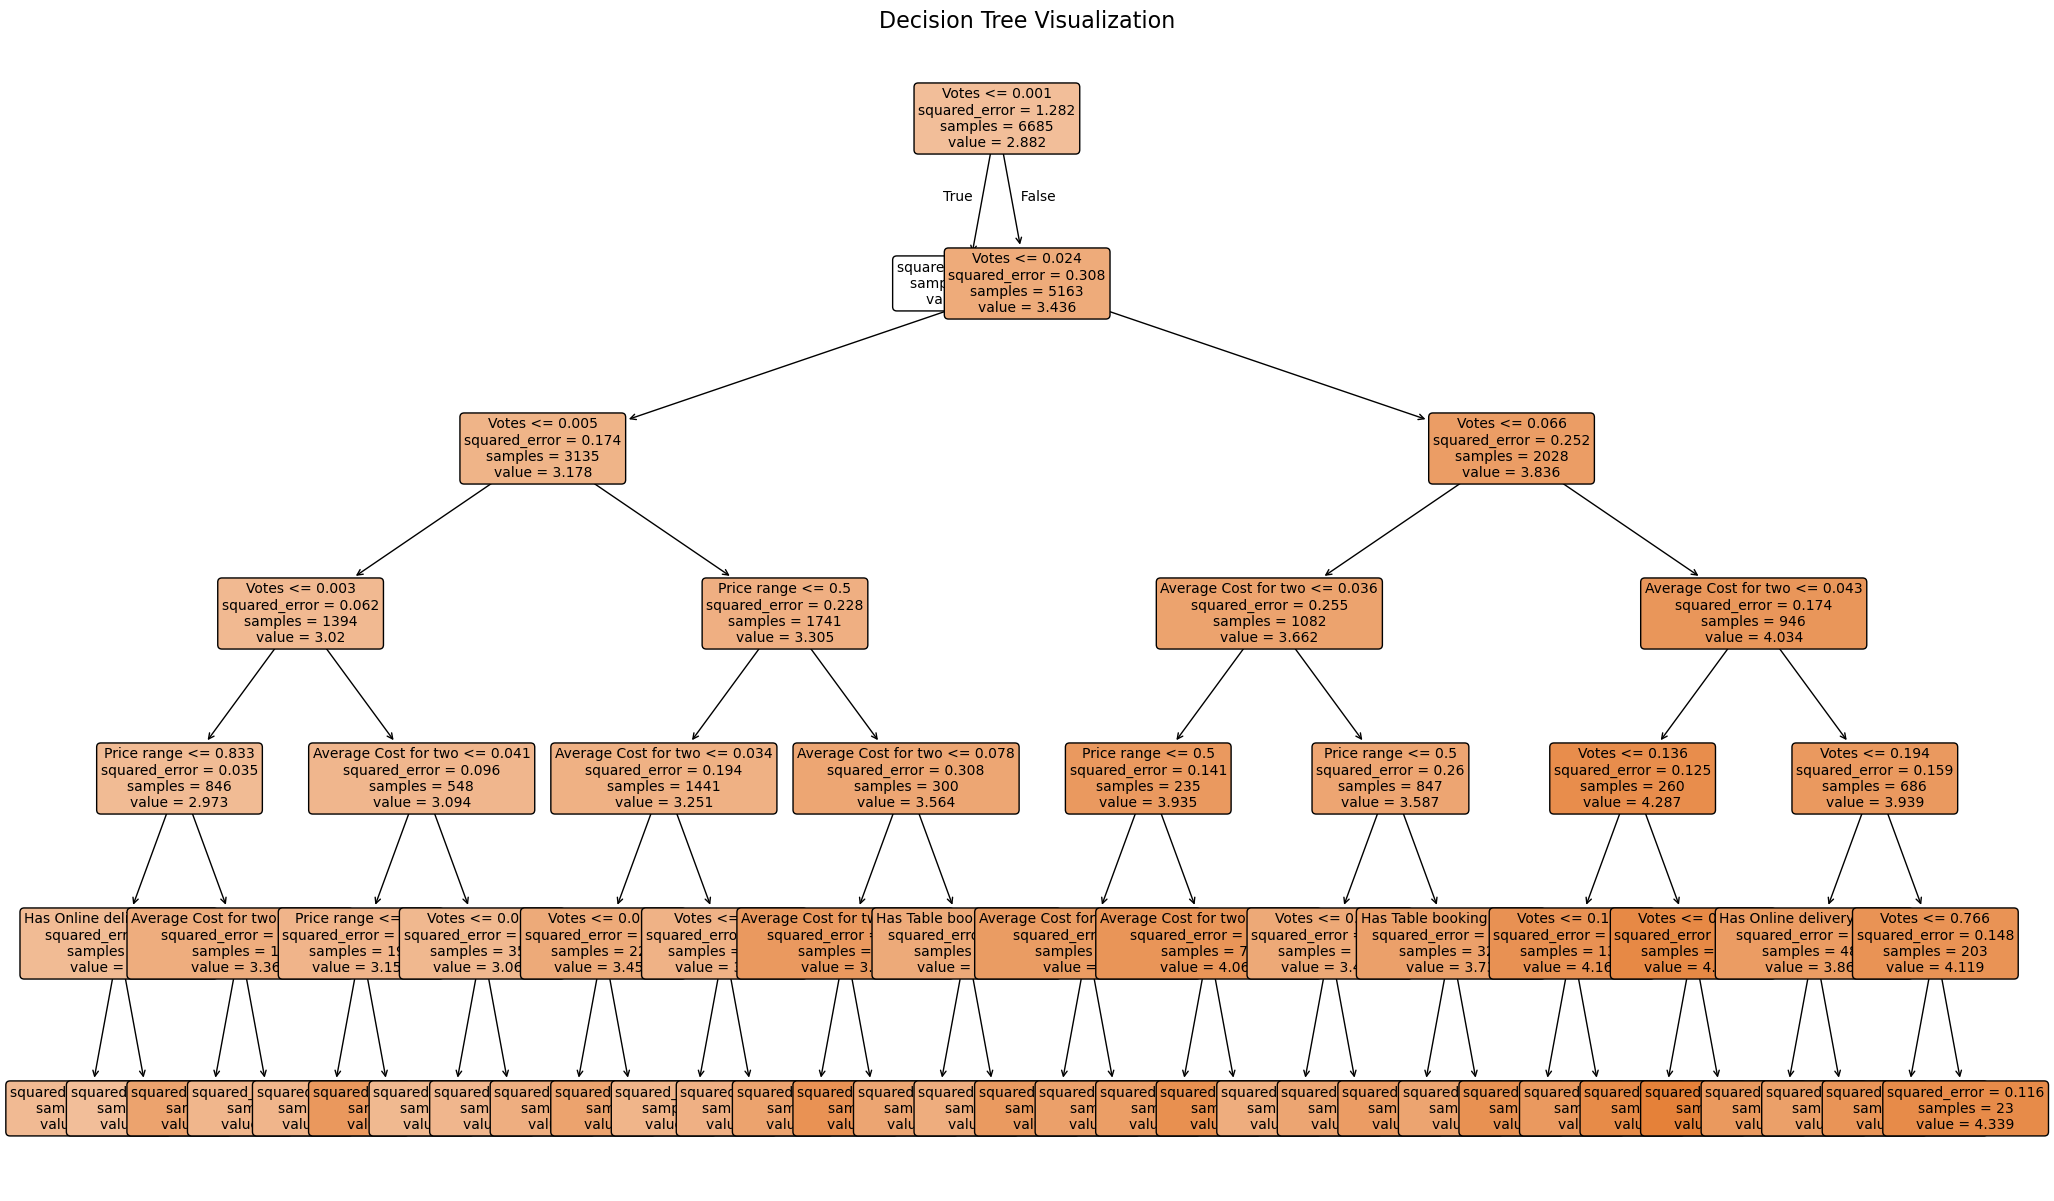

In [100]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(25, 15))

# Plot the tree
plot_tree(DT, 
          feature_names=Predictors, 
          filled=True, 
          rounded=True, 
          fontsize=10)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


Random Forest

In [102]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='squared_error')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RandomForestRegressor(max_depth=2, n_estimators=400)
R2 Value: 0.8812211664130499

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 91.12543830148351
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [89.26892119 91.69346954 91.43898236 92.31008265 92.25961981 93.92242592
 92.58009086 92.86338143 91.76451648 90.06520342]

Final Average Accuracy of the model: 91.82


Plotting one of the Decision Trees in Random Forest

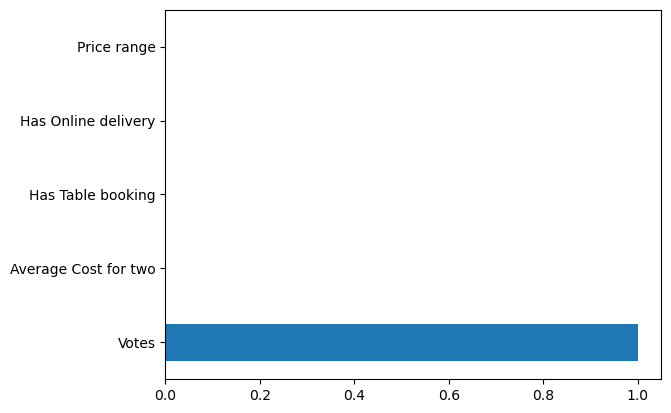

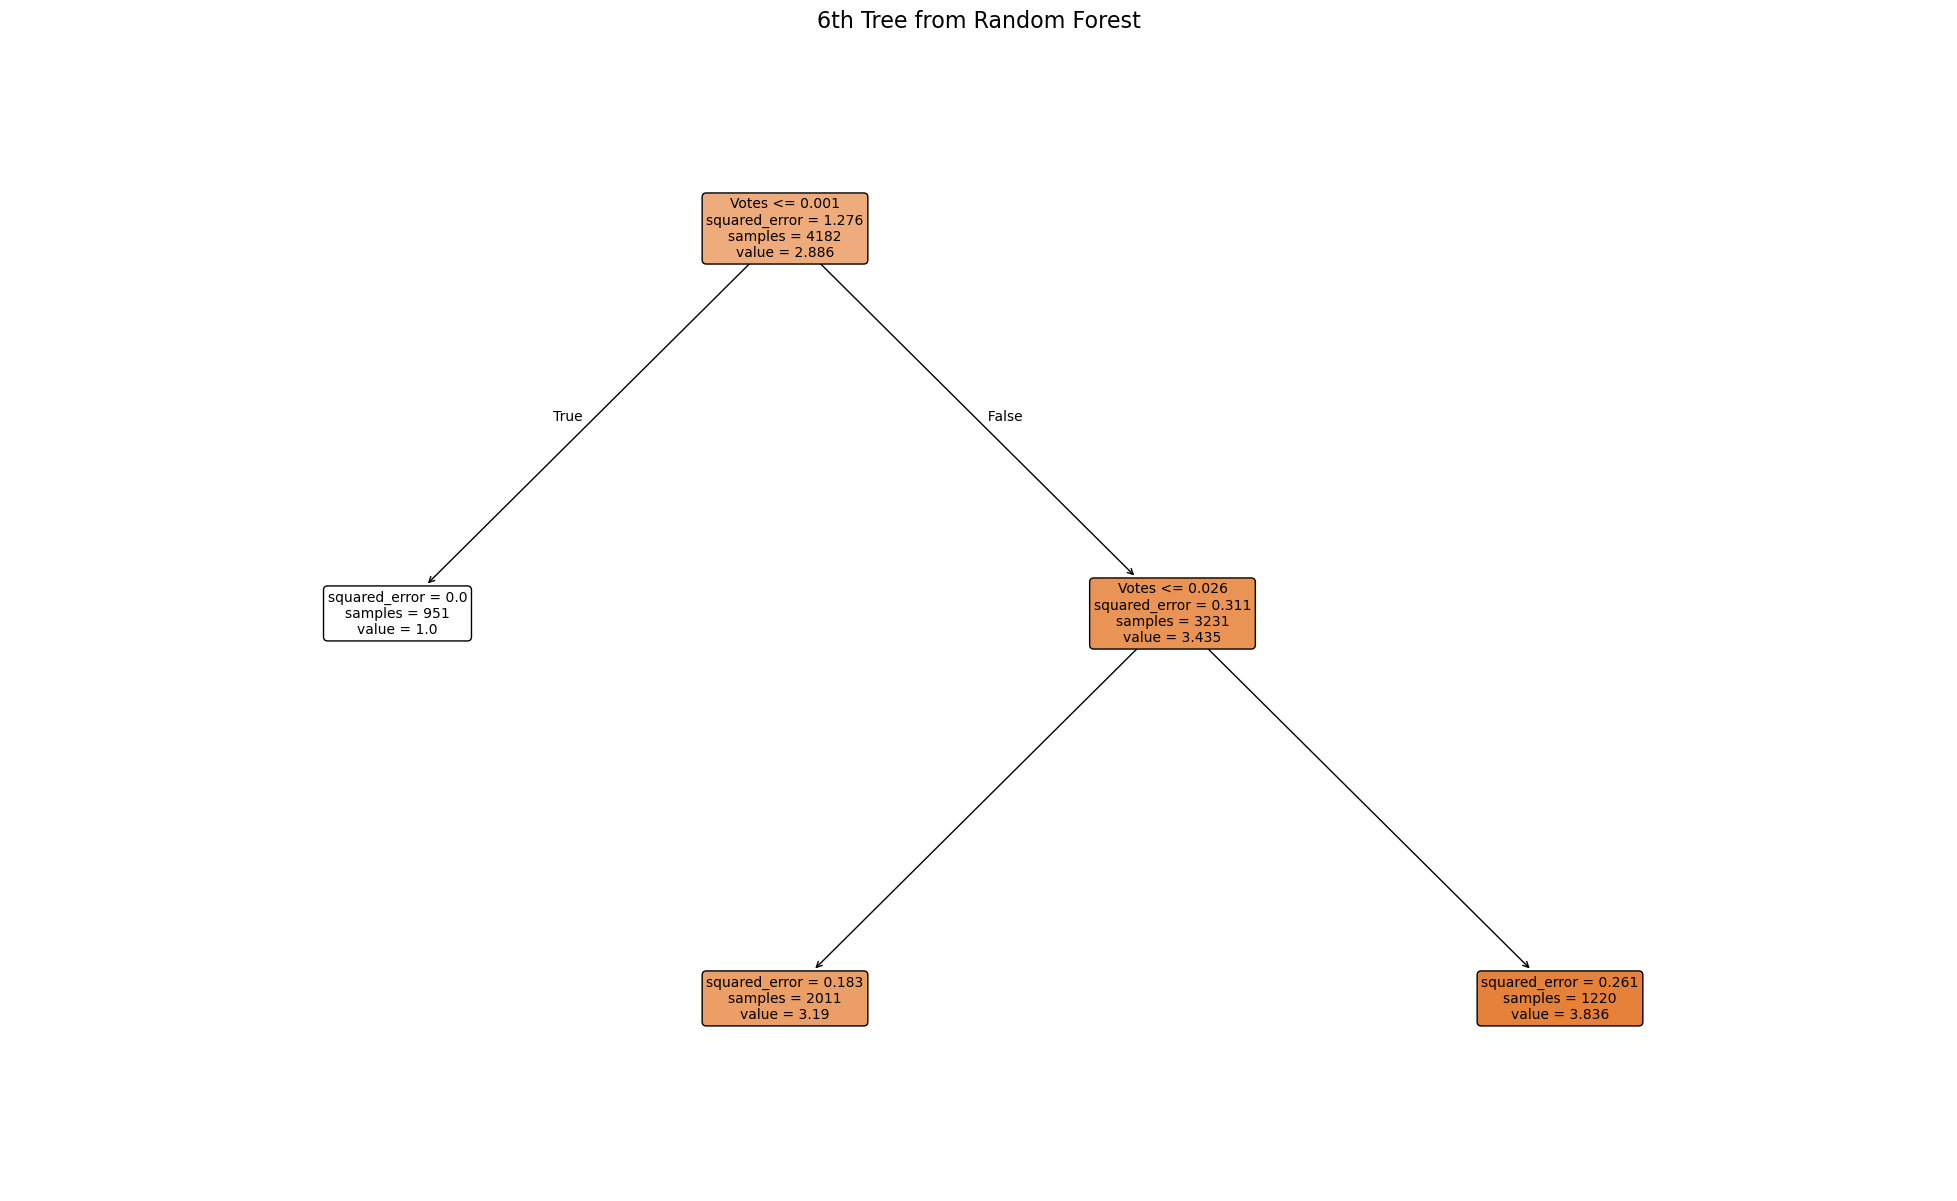

In [104]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the 6th tree from the random forest
plt.figure(figsize=(25, 15))
plot_tree(RegModel.estimators_[5], 
          feature_names=Predictors,
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("6th Tree from Random Forest", fontsize=16)
plt.show()

AdaBoost

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=500)
R2 Value: 0.8942988910123753


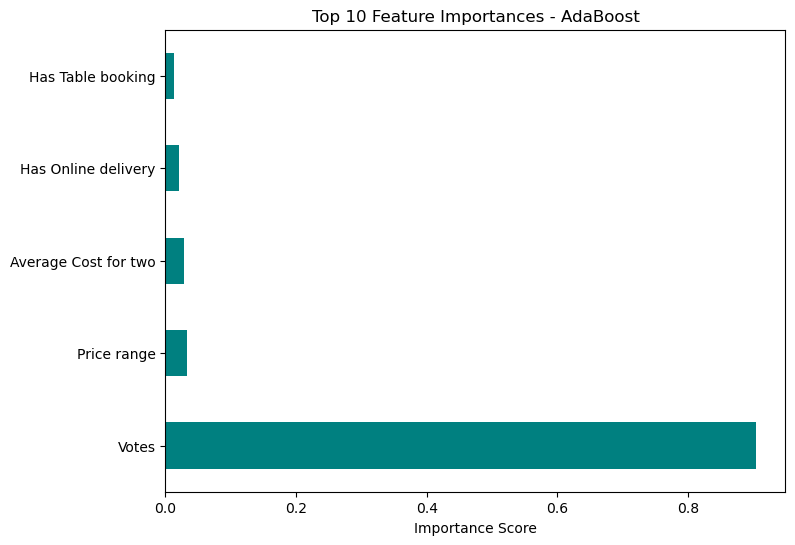


##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              3.0
4     3.5              3.0
Mean Accuracy on test data: 91.50758198646993
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [90.37410367 91.82161987 91.49097833 92.39084273 92.5129704  94.26233799
 92.89881693 92.95043711 92.09813243 90.91147208]

Final Average Accuracy of the model: 92.17


In [106]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Weak learner
DTR = DecisionTreeRegressor(max_depth=3)

# ✅ Fixed: use estimator instead of base_estimator
RegModel = AdaBoostRegressor(estimator=DTR, n_estimators=500, learning_rate=0.04)

# Print model parameters
print(RegModel)

# Fit the model
AB = RegModel.fit(X_train, y_train)
prediction = AB.predict(X_test)

# R2 Score
print('R2 Value:', metrics.r2_score(y_train, AB.predict(X_train)))

# ✅ Plot feature importances
plt.figure(figsize=(8,6))
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances - AdaBoost")
plt.xlabel("Importance Score")
plt.show()

# ------------------ Model Validation ------------------

print('\n##### Model Validation and Accuracy Calculations ##########')

# Create results DataFrame
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

# Print sample predictions
print(TestingDataResults[[TargetVariable, 'Predicted' + TargetVariable]].head())

# Calculate APE and Accuracy
TestingDataResults['APE'] = 100 * (
    abs(TestingDataResults[TargetVariable] - TestingDataResults['Predicted' + TargetVariable]) /
    TestingDataResults[TargetVariable]
)

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Accuracy Scorer Function
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Create scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Cross-validation
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


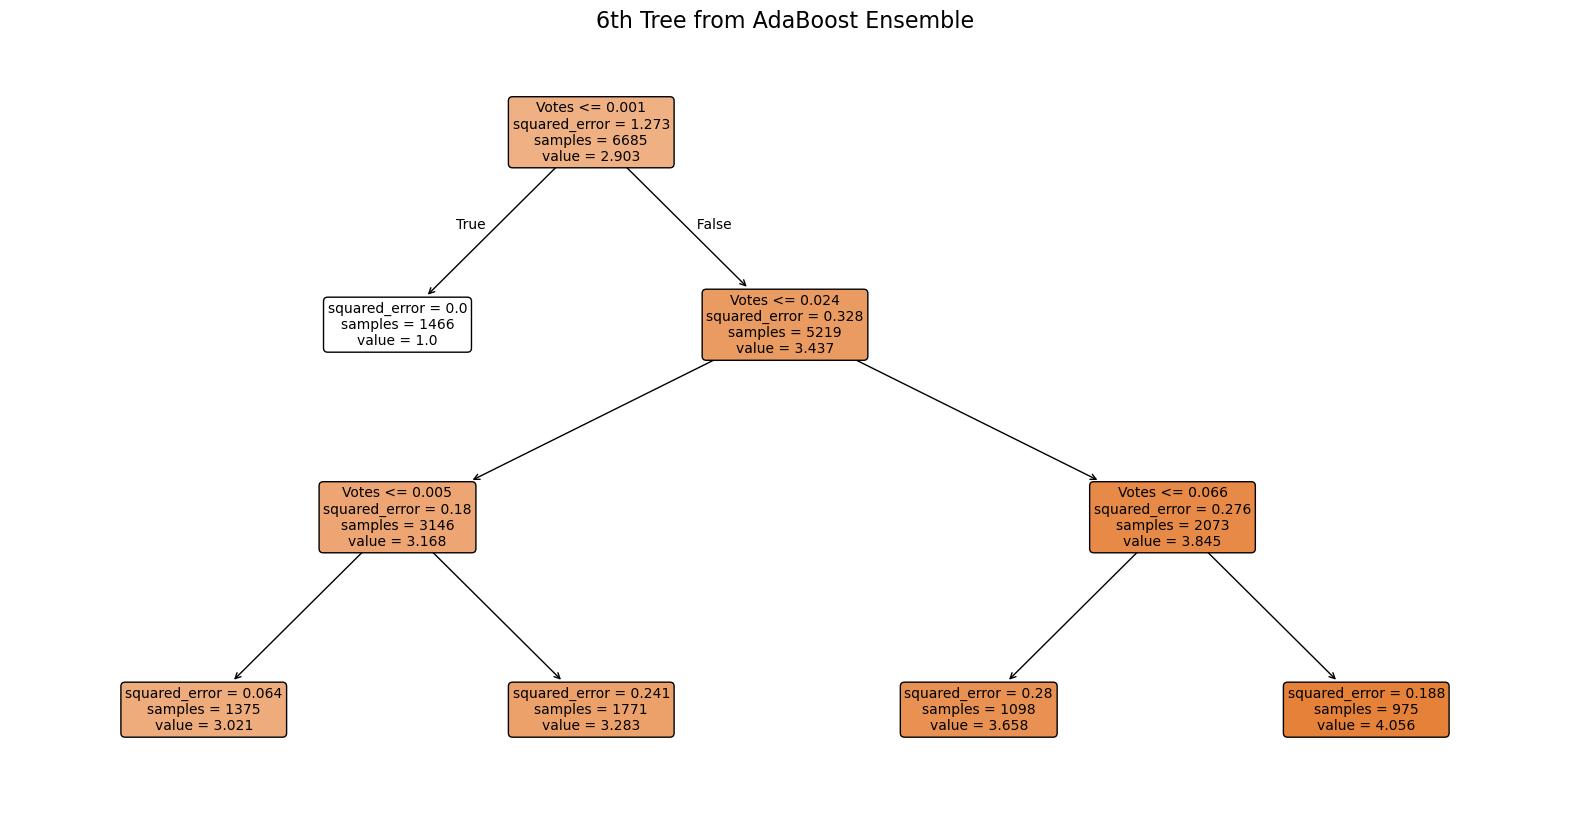

In [107]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the 6th tree in the AdaBoost ensemble (index 5)
plt.figure(figsize=(20, 10))
plot_tree(AB.estimators_[5],
          filled=True,
          rounded=True,
          feature_names=Predictors,
          fontsize=10)

plt.title("6th Tree from AdaBoost Ensemble", fontsize=16)
plt.show()


KNN

In [109]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9374939567216888

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              4.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 90.03584302366156
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [88.59309339 90.52174382 90.84906476 91.57400593 91.5269466  94.16553073
 92.55153993 92.68663057 91.18610769 90.7224709 ]

Final Average Accuracy of the model: 91.44


Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing Decision Trees as the final model since it is very fast for this data!

In order to deploy the model we follow below steps

Train the model using 100% data available
Save the model as a serialized file which can be stored anywhere
Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

In [112]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Votes', 'Average Cost for two', 'Price range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(9551, 3)
(9551,)


In [113]:
# Retraining the model using 100% data
# choose from different tunable hyper parameters
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='squared_error')

# Training the model on 100% Data available
FinalDecisionTreeModel=RegModel.fit(X,y)

In [114]:
# Cross validating the final model accuracy with less predictors
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [90.88375632 92.62959923 92.20786898 92.61384604 92.9569189  95.03041735
 93.69824727 93.89884371 92.78497662 91.88320574]

Final Average Accuracy of the model: 92.86


In [115]:
# Save the model as a serialized file which can be stored anywhere
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\acer\PYTHON\PROJECTS\ZomatoRating Prediction


In [116]:
def FunctionPredictResult(InputData):
    import pandas as pd
    import pickle

    Num_Inputs = InputData.shape[0]
    
    # Load training data (used for dummy creation)
    DataForML = pd.read_pickle('DataForML.pkl')
    
    # Append new input data with original training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generate dummy variables if needed
    InputData = pd.get_dummies(InputData)

    # Ensure same column order used during training
    Predictors = ['Votes', 'Average Cost for two', 'Price range']
    
    # Select only first N rows (i.e., new inputs)
    X = InputData[Predictors].values[0:Num_Inputs]

    # Apply standardization
    X = PredictorScalerFit.transform(X)

    # Load model
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Predict and return
    Prediction = PredictionModel.predict(X)
    PredictionResult = pd.DataFrame(Prediction, columns=['Prediction'])

    return PredictionResult


In [117]:
NewSampleData = pd.DataFrame(
    data=[[314, 1100, 3],
          [591, 1200, 4]],
    columns=['Votes', 'Average Cost for two', 'Price range']
)
print(NewSampleData)
# Call for prediction
print(FunctionPredictResult(InputData=NewSampleData))


   Votes  Average Cost for two  Price range
0    314                  1100            3
1    591                  1200            4
   Prediction
0    3.824441
1    4.102542


Deploying a predictive model as an API

In [119]:
# Function for predictions API
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_Votes, inp_Average_Cost, inp_Price_range):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Votes , inp_Average_Cost, inp_Price_range]],
     columns=['Votes', 'Average Cost for two', 'Price range'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the prediction
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(  inp_Votes=591,
                             inp_Average_Cost =1200,
                             inp_Price_range=4
                             )

'{"Prediction":{"0":4.1025423729}}'

In [120]:
!pip install flask


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
# Creating Flask API
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [122]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Votes_value = float(request.args.get('Votes'))
        Average_Cost_value=float(request.args.get('Average_Cost'))
        Price_range_value=float(request.args.get('Price_range'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                     inp_Votes=Votes_value,
                                                     inp_Average_Cost=Average_Cost_value,
                                                     inp_Price_range=Price_range_value
                                                )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

In [ ]:
# # Starting the API engine
# import os
# if __name__ =="__main__":
    
#     # Hosting the API in localhost
#     app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
#     # Interrupt kernel to stop the API